In [1]:
import tensorflow as tf
import tensorflow_hub as hub

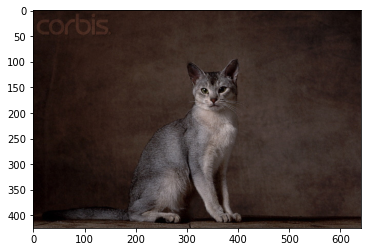

In [2]:
from PIL import Image
image1 = Image.open('../input/the-oxfordiiit-pet-dataset/images/images/Abyssinian_113.jpg')
image2 = Image.open('/kaggle/input/coco128/coco128/images/train2017/000000000650.jpg')
image3 = Image.open('/kaggle/input/coco128/coco128/images/train2017/000000000641.jpg')
image4 = Image.open('/kaggle/input/coco128/coco128/images/train2017/000000000625.jpg')
image5 = Image.open('/kaggle/input/coco128/coco128/images/train2017/000000000540.jpg')
import matplotlib.pyplot as plt
plt.imshow(image1)

In [3]:
hub_model = hub.load('https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1')

2022-03-31 02:17:16.674296: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
import numpy as np
results1 = hub_model([np.asarray(image1)])
results2 = hub_model([np.asarray(image2)])
results3 = hub_model([np.asarray(image3)])
results4 = hub_model([np.asarray(image4)])
results5 = hub_model([np.asarray(image5)])

2022-03-31 02:18:05.521999: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-31 02:18:06.585545: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: StatefulPartitionedCall/Assert_3/AssertGuard/branch_executed/_873


In [5]:
labels = ['background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush']

In [6]:
from PIL import Image, ImageDraw, ImageFont
font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf", 30)
def show_res(image, result):
    im = image.copy()
    draw = ImageDraw.Draw(im)
    x1 = int(image.width * result['detection_boxes'][0][0][1])
    y1 = int(image.height * result['detection_boxes'][0][0][0])
    x2 = int(image.width * result['detection_boxes'][0][0][3])
    y2 = int(image.height * result['detection_boxes'][0][0][2]) 
    draw.rectangle([x1,y1,x2,y2],outline=(0,255,0),width=5)
    draw.text((x1,y1),labels[int(result['detection_classes'][0][0].numpy())] + ' \n  ' + str(result['detection_scores'][0][0].numpy()),font=font,fill=(255,0,0))
    plt.imshow(im)

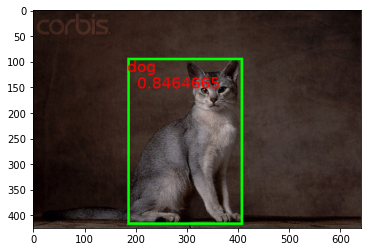

In [7]:
show_res(image1, results1)

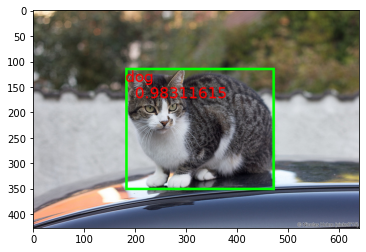

In [8]:
show_res(image2, results2)

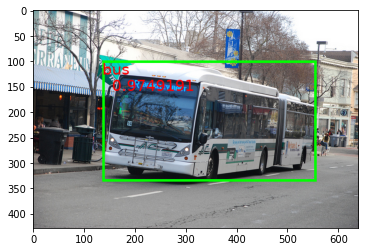

In [9]:
show_res(image3, results3)

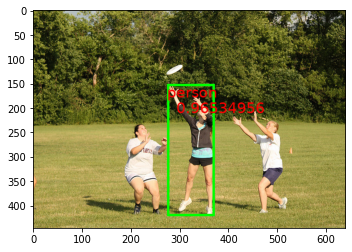

In [10]:
show_res(image4, results4)

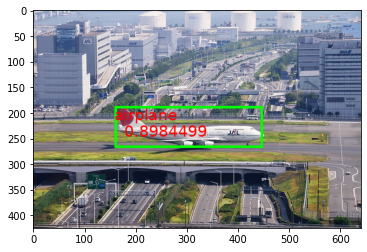

In [11]:
show_res(image5, results5)